<a href="https://colab.research.google.com/github/larislima11/analise-dados/blob/main/AN%C3%81LISE_DE_DADOS_B_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
            antecedents           consequents  support  confidence      lift
0         [Adolescente]                [Male]    0.015    0.750000  1.704545
1                [Male]         [Adolescente]    0.015    0.034091  1.704545
2         [Média Renda]         [Adolescente]    0.015    0.039474  1.973684
3         [Adolescente]         [Média Renda]    0.015    0.750000  1.973684
4              [Adulto]          [Alta Renda]    0.140    0.451613  1.220575
..                  

<ipython-input-18-31d015851126>:41: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



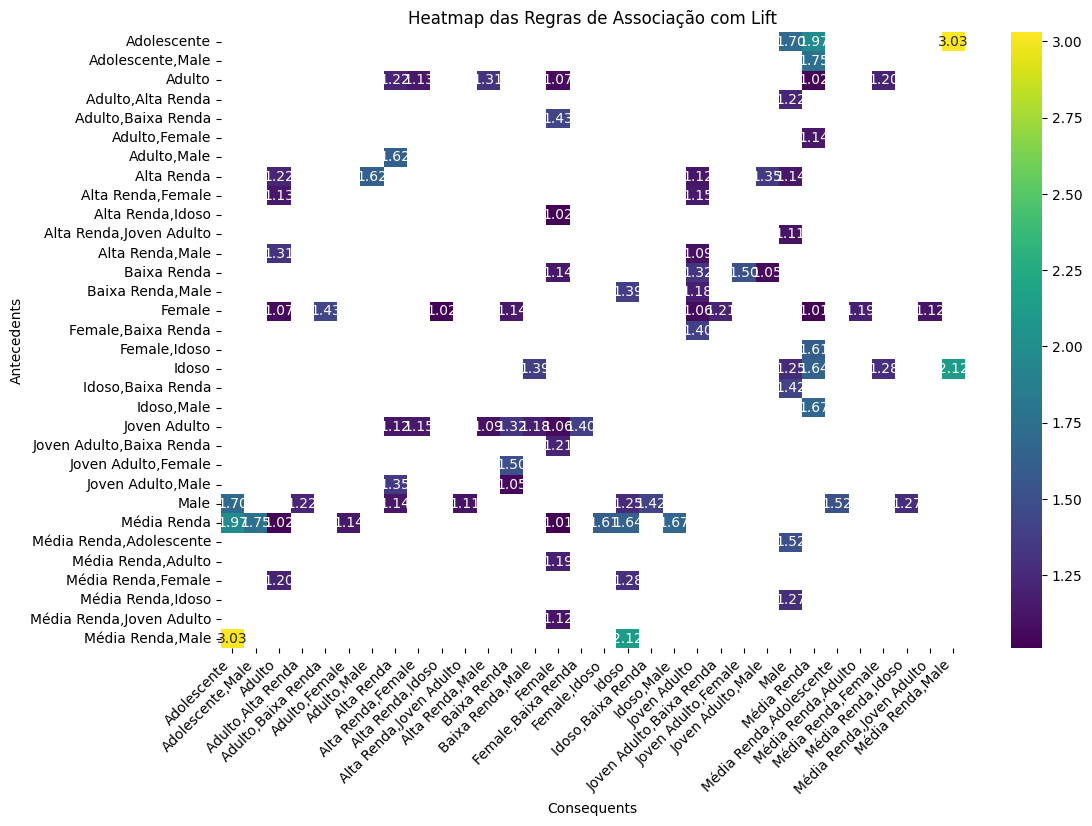

Acurácia: 0.7207792207792207
Matrix de Confusão:
 [[77 22]
 [21 34]]


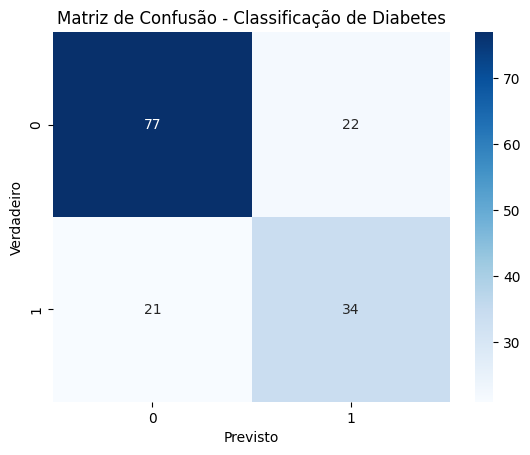

Acurácia: 0.7207792207792207
Matriz de Confusão:
 [[77 22]
 [21 34]]


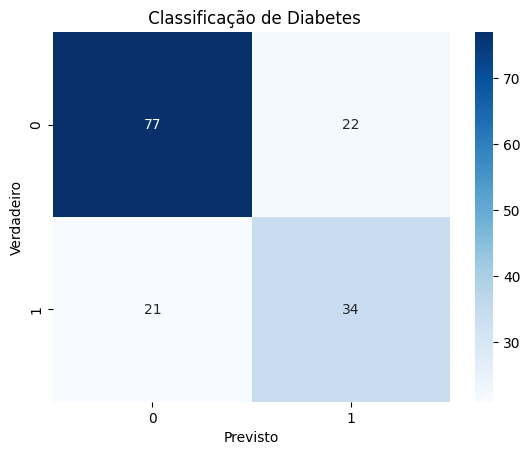

In [ ]:
# Importação das bibliotecas necessárias
!pip install mlxtend
import pandas as pd   # Importa o pandas para manipulação de dados
from mlxtend.frequent_patterns import apriori, association_rules  # Importa funções para análise de padrões frequentes e regras de associação
import matplotlib.pyplot as plt  # Importa o Matplotlib para criação de gráficos
import seaborn as sns # Importa o Seaborn para estilização e visualização de gráficos

# Carregamentode dados

df = pd.read_csv('Mall_Customers.csv')  # Lê o arquivo CSV que contém informações dos clientes
df.head()  # Exibe as primeiras linhas do DataFrame para verificar o conteúdo dos dados
df.info()  # Exibe informações sobre o DataFrame, incluindo tipos de dados e valores não nulos

# Criação de variáveis categóricas a partir de variáveis numéricas
# A variável 'Age' será agrupada em categorias de faixa etária+
# A variável 'Annual Income (k$)' será agrupada em categorias de faixa de renda
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 100], labels=['Adolescente','Joven Adulto','Adulto','Idoso'])  # Cria faixas etárias
df['Income_Group'] = pd.cut(df['Annual Income (k$)'], bins=[0, 40, 70, 150], labels=['Baixa Renda', 'Média Renda', 'Alta Renda'])  # Cria faixas de renda

# Seleção das variáveis relevantes para análise
transactions = df[['Age_Group', 'Genre', 'Income_Group']]
# Transforma os valores em listas de strings para facilitar a análise
transactions = transactions.apply(lambda x: [str(i) for i in x], axis=1).tolist()

# Codificação das transações em um formato binário
from mlxtend.preprocessing import TransactionEncoder  # Importa o codificador de transações
te = TransactionEncoder()   # Cria uma instância do codificador
te_ary = te.fit(transactions).transform(transactions)   # Codifica os dados em formato binário
basket = pd.DataFrame(te_ary, columns=te.columns_)  # Converte o resultado em um DataFrame para análise

# Geração dos conjuntos de itens frequentes
# Aplica o algoritmo Apriori para encontrar combinações de itens frequentes com suporte mínimo de 1%
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)  # Aplica o algoritmo Apriori para encontrar os conjuntos frequentes com suporte mínimo de 1%
# Geração de regras de associação a partir dos conjuntos frequentes
# Define o lift como métrica de avaliação com valor mínimo de 1.0

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0, num_itemsets=2)

# Exibe as regras de associação com as principais métricas
# Converte 'frozenset' para lista para facilitar a leitura dos resultados
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].applymap(lambda x: list(x) if isinstance(x, frozenset) else x))

# Criação de um heatmap para visualizar as regras de associação
# Configura o tamanho da figura para melhor visualização
plt.figure(figsize=(12, 8))

# Prepara os dados para o heatmap: converte 'antecedents' e 'consequents' em strings
sns.heatmap(rules.pivot_table(index=rules['antecedents'].apply(lambda x: ','.join(list(x))), columns=rules['consequents'].apply(lambda x: ','.join(list(x))), values='lift'), annot=True, cmap='viridis', fmt='.2f')  # Cria o gráfico de heatmap com a métrica 'lift'
plt.title('Heatmap das Regras de Associação com Lift') # Adiciona título e rótulos para os eixos do gráfico

plt.xlabel('Consequents')  # Rótulo do eixo X
plt.ylabel('Antecedents')  # Rótulo do eixo Y

# Ajusta a visualização dos rótulos dos eixos
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()  # Exibe o gráfico

# Instalação de bibliotecas necessárias para análise de dados e visualização interativa
!pip install mlxtend plotly

# Importação das bibliotecas principais
import pandas as pd # Manipulação de dados
import plotly.express as px # Criação de gráficos interativos
import plotly.graph_objects as go # Gráficos personalizados com maior controle
from mlxtend.frequent_patterns import apriori, association_rules # Algoritmos para análise de regras de associação
from mlxtend.preprocessing import TransactionEncoder # Conversão de dados para o formato apropriado para Apriori

# Carregamento do conjunto de dados de clientes
# O dataset contém informações sobre idade, gênero e renda anual dos clientes.
df = pd.read_csv('Mall_Customers.csv')

# Criação de faixas etárias categorizadas
# As idades são divididas em três categorias: Adolescente, Jovem Adulto e Adulto.
df['Age Group'] = pd.cut(df['Age'], bins=[18, 35, 50, 100], labels=['Adolescente', 'Jovem Adulto', 'Adulto'])

# Criação de faixas de renda categorizadas
# A renda anual é dividida em três grupos: Baixa Renda, Média Renda e Alta Renda.
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=[0, 40, 70, 150], labels=['Baixa Renda', 'Média Renda', 'Alta Renda'])

# Conversão dos dados para o formato de transações
# Cada linha do DataFrame representa uma transação que combina as categorias de idade, gênero e grupo de renda.
transactions = df[['Age Group', 'Genre', 'Income Group']]
transactions = transactions.apply(lambda x: [str(xi) for xi in x], axis=1).tolist()

# Transformação das transações para o formato apropriado para Apriori
# Utiliza o TransactionEncoder para criar uma matriz binária representando as presenças dos itens.
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Identificação de itens frequentes com o algoritmo Apriori
# Define um suporte mínimo de 1% para filtrar padrões relevantes nos dados.
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Geração de regras de associação baseadas em lift
# Métrica "lift" é usada para identificar as associações mais significativas entre itens.
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0, num_itemsets=len(frequent_itemsets))

# Preparação dos dados para visualização das regras de associação
# Cria uma tabela dinâmica com os "antecedents" (itens anteriores) e "consequents" (itens associados) e calcula os valores médios de lift.
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean').fillna(0)

# Criação de um heatmap interativo para visualizar as regras de associação
# Usa cores para representar os valores de lift entre os pares de itens.
fig_heatmap = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns.astype(str),
    y=heatmap_data.index.astype(str),
    colorscale='Viridis'
))
fig_heatmap.update_layout(
    title='Heatmap das Regras de Associação com Lift',
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    xaxis_tickangle=45
)
fig_heatmap.show()

# Gráfico de pizza para distribuição dos grupos de renda
# Mostra a proporção de clientes em cada categoria de renda (Baixa, Média, Alta).
fig_income_group = px.pie(df, names='Income Group', title='Distribuição do Grupo de Renda', color_discrete_sequence=px.colors.sequential.Viridis)
fig_income_group.update_traces(textposition='inside', textinfo='percent+label')
fig_income_group.show()

# Gráfico de pizza para distribuição de gênero
# Exibe a proporção de clientes do gênero masculino e feminino.
fig_genre = px.pie(df, names='Genre', title='Distribuição de Gênero', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_genre.update_traces(textposition='inside', textinfo='percent+label')
fig_genre.show()

# Histograma para distribuição de renda anual por faixa etária
# Mostra como a renda varia entre os grupos de idade definidos.
fig_hist_income = px.histogram(df, x='Annual Income (k$)', color='Age Group', title='Distribuição de Renda Anual por Faixa Etária', nbins=30, color_discrete_sequence=px.colors.sequential.Viridis)
fig_hist_income.update_layout(xaxis_title='Renda Anual (k$)', yaxis_title='Frequência')
fig_hist_income.show()

# Gráfico de pizza para distribuição dos grupos de idade
# Representa as proporções de clientes em cada faixa etária categorizada.
fig_age_group = px.pie(df, names='Age Group', title='Distribuição de Grupo de Idade', color_discrete_sequence=px.colors.qualitative.Pastel)
fig_age_group.update_traces(textposition='inside', textinfo='percent+label', showlegend=False)
fig_age_group.update_layout(legend=dict(yanchor="top", y=0.1, xanchor="left", x=0.8))
fig_age_group.show()


# Importando as bibliotecas necessárias
import pandas as pd  # Manipulação e análise de dados
from sklearn.model_selection import train_test_split   # Divisão de dados em treino e teste
from sklearn.ensemble import RandomForestClassifier   # Modelo de classificação baseado em Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix  # Cálculo de métricas para avaliação do modelo
import seaborn as sns # Criação de visualizações estatísticas
import matplotlib.pyplot as plt   # Criação de gráficos
import plotly.express as px  # Visualizações interativas
import plotly.graph_objects as go  # Criação de gráficos mais personalizados

# Leitura do conjunto de dados
df = pd.read_csv('diabetes.csv')  # Carrega o arquivo CSV contendo informações sobre diabetes

# Separação das variáveis preditoras (X) e da variável alvo (y)
x = df.drop('Outcome', axis=1)  # Remove a coluna 'Outcome' do DataFrame para formar o conjunto de preditores
y = df['Outcome']   # Define a coluna 'Outcome' como a variável alvo

# Divisão do conjunto de dados em treino (80%) e teste (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # 80% treino, 20% teste

# Instanciação e treinamento do modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42) # Cria o modelo com 100 árvores de decisão
model.fit(x_train, y_train)  #  Treinamento do modelo com os dados de treino

# Realização de previsões no conjunto de teste
y_pred = model.predict(x_test) # Gera previsões com base nos dados de teste

# Avaliação do modelo utilizando métricas
print("Acurácia:", accuracy_score(y_test, y_pred))  #  Calcula e exibe a acurácia do modelo
print("Matrix de Confusão:\n", confusion_matrix(y_test, y_pred))  # Exibe a matriz de confusão

# Visualização da matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') # Criação de heatmap para a matriz de confusão
plt.title('Classificação de Diabetes')  # Define o título do gráfico
plt.xlabel('Previsto')  # Define o rótulo do eixo X
plt.ylabel('Verdadeiro')  # Define o rótulo do eixo Y
plt.show()  # Exibe o gráfico gerado

# Cenário 4:

import pandas as pd # Biblioteca para manipulação de dados em formato tabular
import numpy as np  # Biblioteca para operações matemáticas e numéricas avançadas
from sklearn.model_selection import train_test_split   # Função para dividir os dados em conjuntos de treino e teste
from sklearn.ensemble import RandomForestClassifier  # Modelo de classificação baseado em Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix  # Métricas de desempenho do modelo
import seaborn as sns # Biblioteca para visualização de dados com gráficos estatísticos
import matplotlib.pyplot as plt   # Biblioteca para criação de gráficos estáticos
import plotly.express as px  # Biblioteca para criação de gráficos interativos
import plotly.graph_objects as go  # Módulo do Plotly para gráficos personalizados

df = pd.read_csv('diabetes.csv')  # Carregando o dataset de diabetes a partir de um arquivo CSV
X = df.drop('Outcome', axis=1) # Definindo X como as variáveis independentes (previsoras)
y = df['Outcome']  # Definindo y como a variável dependente

# Divisão dos Dados em Conjuntos de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Separando 80% dos dados para treino e 20% para teste com random_state para reprodutibilidade

# Criação e Treinamento do Modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Instanciando o modelo Random Forest com 100 árvores
model.fit(X_train, y_train)  # Treinando o modelo com os dados de treino

# Avaliação do Modelo
y_pred = model.predict(X_test)  # Faz previsões com os dados de teste
print("Acurácia:", accuracy_score(y_test, y_pred))  # Exibe a acurácia do modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))  # Exibe a matriz de confusão

# Visualização da Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
# Criando um heatmap para visualizar os resultados da matriz de confusão
plt.title(" Classificação de Diabetes")  # Adicionando título ao gráfico
plt.xlabel('Previsto')   # Rótulo do eixo X
plt.ylabel('Verdadeiro')  # Rótulo do eixo Y
plt.show()  # Exibe o gráfico

# Gráfico de Distribuição dos Resultados de Diabetes
fig_pizza_outcome = px.pie(df, names='Outcome', title='Distribuição dos Resultados de Diabetes',
                           color_discrete_sequence=px.colors.sequential.Viridis)
fig_pizza_outcome.show()

# Gráfico de Distribuição dos Níveis de Glicose
fig_hist_glucose = px.histogram(df, x='Glucose', title='Distribuição dos Níveis de Glicose', nbins=10,
                                color_discrete_sequence=px.colors.sequential.Blues)
fig_hist_glucose.update_layout(
    xaxis_title='Nível de Glicose',
    yaxis_title='Frequência'
)
fig_hist_glucose.show()

# Criando um histograma para visualizar a distribuição dos níveis de glicose
fig_scatter_age_glucose = px.scatter(df, x='Age', y='Glucose', color='Outcome', # Rótulo do eixo X
                                     title='Relação entre Idade e Nível de Glicose', # Rótulo do eixo Y

                                     color_continuous_scale=px.colors.sequential.Viridis)
fig_scatter_age_glucose.update_layout(
    xaxis_title='Idade',
    yaxis_title='Nível de Glicose'
)
fig_scatter_age_glucose.show()
# Exibindo o gráfico

# Gráfico de Barras: Distribuição do IMC por Faixa Etária
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 35, 50, 100], labels=['20-35', '35-50', '50+'])
fig_bar_bmi_age_group = px.histogram(df, x='Age_Group', y='BMI', color='Age_Group', title='Distribuição de IMC por Faixa Etária',
                                     barmode='group', histfunc='avg', color_discrete_sequence=px.colors.sequential.Plasma)

# Gráfico de barras para visualizar o IMC médio por faixa etária
fig_bar_bmi_age_group.update_layout(
    xaxis_title='Faixa Etária',
    yaxis_title='IMC Médio'
)
fig_bar_bmi_age_group.show() #Exibindo gráfico.









# O que o gráfico representa?

Linhas (Antecedents): Cada linha do gráfico representa um conjunto de categorias que foram identificadas como precursores (antecedentes) em uma regra de associação.
Colunas (Consequents): Cada coluna representa os itens que foram identificados como consequências nos padrões associados.
Cores e Anotações (Lift): A intensidade da cor e os valores numéricos indicam o valor do lift. Valores mais altos de lift (cores mais intensas) sugerem que os itens nos antecedents têm maior probabilidade de ocorrer em conjunto com os itens nos consequents do que seria esperado ao acaso.

2. Relação com os dados
O gráfico demonstra como categorias como faixa etária (Age_Group), gênero (Genre), e faixa de renda (Income_Group) estão relacionadas.
Por exemplo, se um antecedente como "Adulto" está associado a um consequente como "Alta Renda" com um lift alto, isso indica que a ocorrência de clientes adultos em conjunto com alta renda é mais frequente do que seria por acaso.

3. Interpretação prática
Segmentação de clientes: O gráfico pode ser usado para identificar grupos específicos de clientes que apresentam comportamentos semelhantes. Por exemplo, "Jovens Adultos" e "Média Renda" podem aparecer frequentemente associados.
Ações de marketing: Empresas podem usar esses padrões para criar campanhas direcionadas, oferecendo produtos específicos para grupos demográficos mais propensos a comprá-los.
Decisões estratégicas: Se certos grupos não estão fortemente associados, pode ser um indicativo de que é necessário explorar estratégias para atrair esses segmentos.

4. Benefício do uso do heatmap
O heatmap apresenta as associações de maneira intuitiva e visual, facilitando a identificação de relações significativas entre variáveis categóricas dos dados. Ele é especialmente útil quando o número de regras geradas é grande, pois fornece uma visão geral condensada dos padrões mais importantes.

**Esse gráfico, é uma ferramenta poderosa para compreender o comportamento dos clientes e orientar estratégias baseadas nos dados analisados.**

# Análise do Cenário 1 e Cenário 3

Cenário 1:
No Cenário 1, a análise se concentra na identificação de padrões frequentes e regras de associação em um conjunto de dados sobre clientes de um shopping, especificamente suas faixas etárias, gêneros e grupos de renda.

Pontos explorados no código:

Criação de variáveis categóricas: A faixa etária e o grupo de renda foram criados para facilitar a análise dos clientes.
Codificação binária das transações: Utilizando o algoritmo Apriori, os dados foram transformados para identificar conjuntos de itens frequentes e, posteriormente, gerar regras de associação com base no lift.

Geração de gráficos de visualização:

Heatmap para visualizar as regras de associação entre as variáveis categóricas.
Distribuição do grupo de renda e gênero através de gráficos de pizza.
Distribuição de renda por faixa etária através de um histograma.
Pontos para informar ao usuário:

Análise de correlação entre idade, renda e gênero:

Exibir quais grupos de clientes têm maior probabilidade de se relacionar em termos de faixa etária e renda.
Regras de associação: As regras de associação geradas pelo algoritmo Apriori podem ser usadas para identificar combinações de categorias que ocorrem frequentemente juntas. Por exemplo, podemos analisar quais grupos de idade e renda estão mais propensos a comprar produtos juntos.

Gráficos sugeridos para o dashboard:

Heatmap: Para exibir as regras de associação, destacando a relação entre diferentes faixas etárias, rendas e gêneros.
Gráfico de pizza para faixas etárias: Exibir a distribuição de clientes em diferentes faixas etárias.
Gráfico de barras para a relação entre a renda e a faixa etária: Mostrar como os diferentes grupos etários se distribuem entre os grupos de renda.

Cenário 3:

No Cenário 3, o foco é em um modelo de classificação usando Random Forest para prever se um paciente tem ou não diabetes, com base em variáveis como idade, glicose, IMC, etc.

Pontos explorados no código:

Separação entre variáveis preditoras e alvo: A variável Outcome é o alvo (diabetes: 0 ou 1), e as demais variáveis são preditoras.
Divisão em treino e teste: O conjunto de dados foi dividido em treino e teste, com 80% dos dados para treino e 20% para teste.
Treinamento do modelo Random Forest: O modelo foi treinado e avaliado com base na acurácia e na matriz de confusão.

Visualizações:
Distribuição dos resultados de diabetes: Um gráfico de pizza mostrando a proporção de pessoas com e sem diabetes.
Distribuição dos níveis de glicose: Histograma para entender como a glicose se distribui nos pacientes.

Relação entre idade e glicose:

Scatter plot para observar a relação entre idade e os níveis de glicose.
Distribuição do IMC por faixa etária: Gráfico de barras mostrando a distribuição do IMC entre diferentes faixas etárias.

Pontos para informar ao usuário:

Acuracidade do modelo:
Informar ao usuário a acurácia do modelo, além de visualizar a matriz de confusão para entender melhor os resultados (falsos positivos e falsos negativos).
Distribuição de diabetes e glicose:
A visualização da distribuição de glicose e a distribuição do diabetes fornecem insights sobre o comportamento de glicose em pessoas com e sem diabetes.
Relação entre idade e glicose:
 Esta análise pode fornecer insights sobre o quanto a glicose aumenta com a idade.
Gráficos sugeridos para o dashboard:

Matriz de confusão: Para mostrar a acurácia do modelo.
Gráfico de pizza para os resultados de diabetes: Para visualização rápida da proporção de pacientes com e sem diabetes.
Histograma para os níveis de glicose: Para observar como os níveis de glicose se distribuem entre os pacientes.
Gráfico de dispersão (scatter plot) para observar a relação entre idade e glicose.
Gráfico de barras para IMC por faixa etária: Para ver o IMC médio em diferentes faixas etárias e entender como ele varia.

Proposta de Dashboard para os dois cenários:
Para o Cenário 1 (clientes de shopping), o dashboard pode incluir os seguintes gráficos:

Heatmap para regras de associação, destacando combinações de faixa etária, renda e gênero.
Gráficos de pizza para a distribuição de clientes em diferentes faixas etárias e grupos de renda.
Gráfico de barras para a distribuição de renda por faixa etária, mostrando como a renda varia entre os grupos etários.
Para o Cenário 3 (diabetes), o dashboard pode incluir:

Gráfico de pizza para a distribuição de diabetes (com ou sem diabetes).
Histograma para a distribuição dos níveis de glicose.
Gráfico de dispersão mostrando a relação entre idade e glicose.
Gráfico de barras para a distribuição do IMC por faixa etária.
Matriz de confusão para avaliar a acurácia do modelo de classificação.

Considerações Finais:

Esses gráficos e visualizações ajudam a entender padrões no comportamento dos clientes no cenário 1 e a previsão de diabetes no cenário 3. Para um dashboard interativo, ferramentas como Plotly e Dash podem ser usadas para criar visualizações dinâmicas e interativas, permitindo ao usuário explorar diferentes perspectivas dos dados, como seleção de faixas etárias ou grupos de renda no Cenário 1 e a análise de variáveis específicas no Cenário 3.

# Pontos que Podem ser Explorados e Informados ao Usuário

Ao analisar os dados dos clientes e as regras de associação geradas, vários insights úteis podem ser obtidos e comunicados ao usuário. A seguir estão alguns dos pontos principais que podem ser explorados:

1. Segmentação de Clientes
Identificar os perfis de clientes mais frequentes, como grupos por faixa etária, gênero e renda.
Informar sobre o comportamento típico de cada segmento, como hábitos de compra ou categorias de produtos preferidas.

2. Correlação entre Faixas de Renda e Faixas Etárias
Demonstrar quais faixas de renda predominam em diferentes grupos etários.
Sugerir produtos ou serviços que se alinhem às necessidades desses grupos.

3. Insights de Gênero
Avaliar a representatividade de homens e mulheres em diferentes categorias de renda e idade.
Sugerir estratégias de marketing específicas para cada gênero.

4. Identificação de Padrões de Consumo
Explorar as combinações de categorias mais frequentes nos dados, como "Jovem Adulto e Alta Renda".
Usar essas combinações para prever tendências de comportamento.

5. Análise de Regras de Associação
Identificar associações significativas, como clientes "Adultos" com "Média Renda" sendo mais propensos a determinados tipos de produtos ou serviços.
Destacar oportunidades de cross-selling e up-selling com base nos padrões encontrados.

# Gráficos Propostos para um Dashboard Informativo

Para construir um dashboard rico em informações, é essencial utilizar uma combinação de gráficos que apresentem insights de maneira visualmente clara e objetiva. A seguir estão os gráficos recomendados e suas finalidades:

1. Gráfico de Barras Empilhadas
Uso: Mostrar a distribuição de clientes por faixa etária e renda em conjunto.
Insight: Identifica quais faixas etárias predominam em diferentes grupos de renda.

2. Gráfico de Pizza
Uso: Exibir a proporção de clientes por gênero.
Insight: Avaliar o equilíbrio de gêneros entre os clientes.

3. Mapa de Calor (Heatmap)
Uso: Representar as regras de associação (como no código gerado).
Insight: Identificar combinações frequentes e de alto lift entre categorias de dados.

4. Gráfico de Dispersão
Uso: Relacionar a idade e a renda anual dos clientes.
Insight: Mostrar a concentração de clientes em faixas específicas e identificar outliers.

5. Gráfico de Radar
Uso: Comparar múltiplas variáveis (idade, gênero, renda) em uma única visualização.
Insight: Oferece uma visão comparativa das características dos clientes.

6. Tabela Dinâmica
Uso: Mostrar os detalhes das regras de associação com suporte, confiança e lift.
Insight: Facilita a exploração detalhada de padrões encontrados.

7. Gráfico de Linhas
Uso: Mostrar tendências no comportamento dos clientes ao longo do tempo (se dados temporais estiverem disponíveis).
Insight: Revela variações sazonais ou tendências de crescimento.

# Aplicação no Contexto de BI

Combinando esses gráficos, o dashboard se torna uma poderosa ferramenta de Business Intelligence (BI), permitindo ao usuário:

1. Tomar decisões baseadas em dados sobre estratégias de marketing e vendas.

2. Identificar segmentos de clientes subatendidos e criar campanhas específicas.

3. Monitorar mudanças no comportamento do cliente ao longo do tempo e ajustar estratégias.

Essa abordagem não apenas apresenta os dados de forma visual e interativa, mas também capacita os usuários a extrair o máximo valor das informações disponíveis.